In [33]:
# python script
# -*- coding: utf-8
"""
@author: Wanru Li
@contact: wliwanru@foxmail.com
@create: 2022/4/26-10:37
"""
import os
import sys
os.chdir(r'C:\wanruli\codes\project_codes\xuanwu_sEEG')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from neurora.rdm_cal import bhvRDM
from neurora.rsa_plot import plot_rdm, plot_corrs_by_time
from neurora.rdm_corr import rdm_correlation_spearman, rdm_correlation_pearson, rdm_correlation_kendall
from config.mne_config import ROOT_DIR, work_path, sub_list, session_list

os.chdir(work_path)


In [34]:
def save2file(fig, fig_filename, overwrite=False):
    if not overwrite:
        if not os.path.exists(fig_filename):
            fig.savefig(fig_filename, dpi=600)
        else:
            print('*** ', fig_filename, 'already exists! ***')
    else:
        fig.savefig(fig_filename, dpi=600)

In [35]:
roi_names = ['EVC', 'LOC', 'PFS', 'OPA', 'PPA', 'RSC']

## RSA: fc6 & beta

In [36]:

df_corr_fc6_w_beta = pd.read_excel(r'rsa\rsa_fc6_and_beta.xlsx')


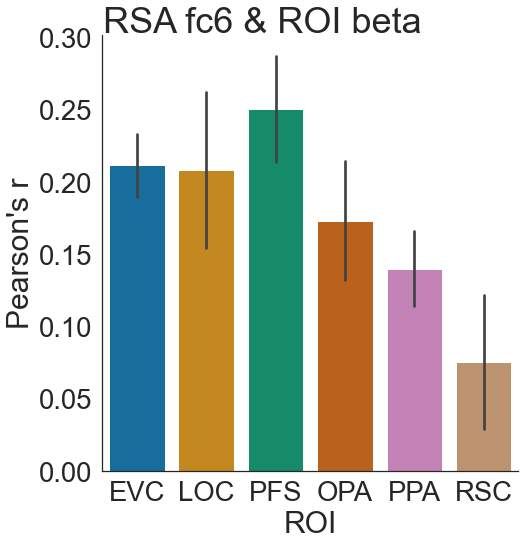

In [37]:
# ======== plot only one kind of correlation ==================
sns.set_theme(style='white', font_scale=2.5)
bar_single = sns.catplot(data=df_corr_fc6_w_beta,
                         kind='bar', x='ROI', y='pearson r', ci='sd',
                         palette='colorblind', alpha=1, height=8, legend=False)
bar_single.set_axis_labels('ROI', "Pearson's r")
bar_single.fig.suptitle('RSA fc6 & ROI beta')

fig_filename = r'rsa\plot\corr_fc6_w_beta_pearson_coefficient.png'
save2file(bar_single.figure, fig_filename)



***  rsa\plot\corr_fc6_w_beta_all_coefficient.png already exists! ***


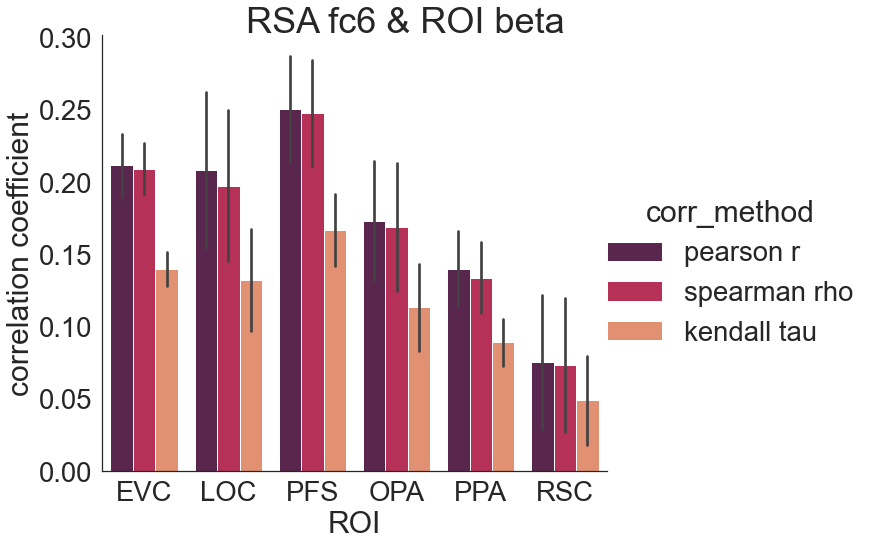

In [38]:
# ========== plot all correlation type ===============
df_corr_fc6_w_beta_reshaped = df_corr_fc6_w_beta.melt(id_vars=['subj', 'ROI'],
                                           value_vars=['pearson r', 'spearman rho', 'kendall tau'],
                                           var_name='corr_method', value_name='val', ignore_index=True)

sns.set_theme(style='white', font_scale=2.5)
bar_all = sns.catplot(data=df_corr_fc6_w_beta_reshaped,
                         kind='bar', x='ROI', y='val', hue='corr_method', ci='sd',
                         palette='rocket', alpha=1, height=8, aspect=1.2, legend=True)
bar_all.set_axis_labels('ROI', "correlation coefficient")
bar_all.fig.suptitle('RSA fc6 & ROI beta')

fig_filename = r'rsa\plot\corr_fc6_w_beta_all_coefficient.png'
save2file(bar_all.figure, fig_filename)



## RSA: object2vec & beta

In [39]:

df_corr_object2vec_w_beta = pd.read_excel(r'rsa\rsa_object2vec_and_beta.xlsx')


***  rsa\plot\corr_object2vec_w_beta_pearson_coefficient.png already exists! ***


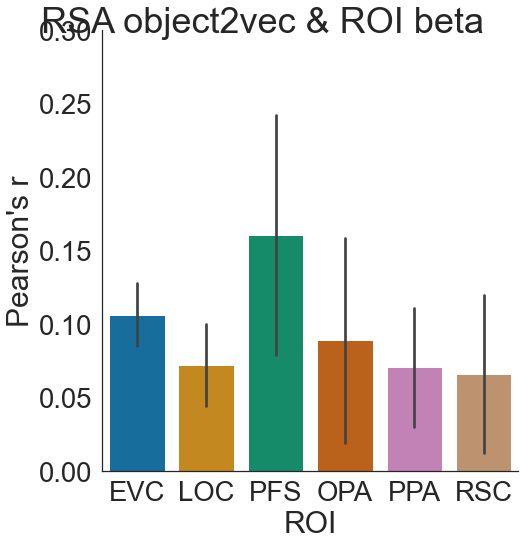

In [40]:
# ======== plot only one kind of correlation ==================
sns.set_theme(style='white', font_scale=2.5)
bar_single = sns.catplot(data=df_corr_object2vec_w_beta,
                         kind='bar', x='ROI', y='pearson r', ci='sd',
                         palette='colorblind', alpha=1, height=8, legend=False)
bar_single.ax.set_ylim([0, 0.3])
bar_single.set_axis_labels('ROI', "Pearson's r")

bar_single.fig.suptitle('RSA object2vec & ROI beta')


fig_filename = r'rsa\plot\corr_object2vec_w_beta_pearson_coefficient.png'
save2file(bar_single.figure, fig_filename)



***  rsa\plot\corr_object2vec_w_beta_all_coefficient.png already exists! ***


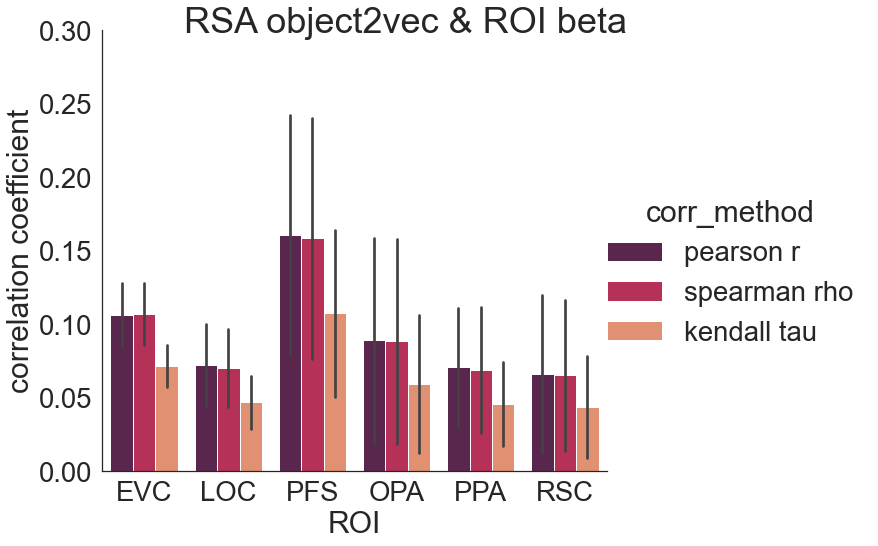

In [41]:
# ========== plot all correlation type ===============
df_corr_object2vec_w_beta_reshaped = df_corr_object2vec_w_beta.melt(id_vars=['subj', 'ROI'],
                                                  value_vars=['pearson r', 'spearman rho', 'kendall tau'],
                                                  var_name='corr_method', value_name='val', ignore_index=True)

sns.set_theme(style='white', font_scale=2.5)
bar_all = sns.catplot(data=df_corr_object2vec_w_beta_reshaped,
                      kind='bar', x='ROI', y='val', hue='corr_method', ci='sd',
                      palette='rocket', alpha=1, height=8, aspect=1.2, legend=True)
bar_all.ax.set_ylim([0, 0.3])
bar_all.set_axis_labels('ROI', "correlation coefficient")
bar_all.fig.suptitle('RSA object2vec & ROI beta')

fig_filename = r'rsa\plot\corr_object2vec_w_beta_all_coefficient.png'
save2file(bar_all.figure, fig_filename)


## compare fc6 & object2vec with beta

In [42]:
df_corr_fc6_w_beta_reshaped['model'] = 'fc6'
df_corr_object2vec_w_beta_reshaped['model'] = 'object2vec'

df_corr_combined = df_corr_fc6_w_beta_reshaped.append(df_corr_object2vec_w_beta_reshaped)


***  rsa\plot\corr_compare_2models_w_beta_pearson.png already exists! ***


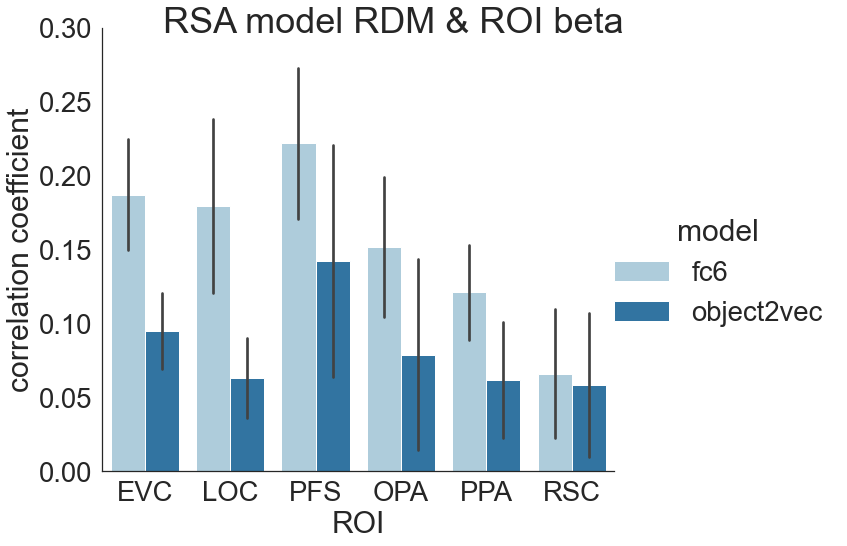

In [43]:
# ========== plot all correlation type ===============
df_corr_combined_r = df_corr_combined.loc[df_corr_combined.corr_method == 'pearson r']
sns.set_theme(style='white', font_scale=2.5)
bar_all = sns.catplot(data=df_corr_combined,
                      kind='bar', x='ROI', y='val', hue='model', ci='sd',
                      palette='Paired', alpha=1, height=8, aspect=1.2, legend=True)
bar_all.ax.set_ylim([0, 0.3])
bar_all.set_axis_labels('ROI', "correlation coefficient")
bar_all.fig.suptitle('RSA model RDM & ROI beta')

fig_filename = r'rsa\plot\corr_compare_2models_w_beta_pearson.png'
save2file(bar_all.figure, fig_filename)

